# **TASK 2:UNEMPLOYMENT ANALYSIS WITH PYTHON**

**Question ??? .....
*Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.***

**1. Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Import Libraries**

1.	pandas: The foundation for data manipulation. It allows you to read CSV files (like your unemployment data), clean data, perform calculations, and organize data into tables (DataFrames).
2.	matplotlib.pyplot: Used for basic plotting. It helps you visualize data through line plots, histograms, scatter plots, and more.
3.	seaborn: Provides a higher-level interface to matplotlib for creating visually appealing and informative plots. It simplifies tasks like customizing colors, styles, and annotations.
4.	sklearn.model_selection: Essential for splitting your data into training and testing sets. This ensures you can train your models on one part of the data and evaluate their performance on unseen data.
5.	sklearn.linear_model: Contains algorithms for linear regression, which tries to find a linear relationship between your input features and the target variable (unemployment rate).
6.	sklearn.tree: Holds the decision tree algorithm. Decision trees make predictions by splitting the data based on specific features, creating a tree-like structure.
7.	sklearn.ensemble: Provides more advanced algorithms like random forests. Random forests combine multiple decision trees to make predictions, which can lead to better accuracy.
8.	sklearn.metrics: Provides functions to measure how well your trained models perform. It calculates metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared to assess prediction accuracy.
9.	google.colab: Used if you're working in Google Colab to access files from your Google Drive.



**2. Data Loading and Preprocessing**

In [ ]:
# --- Data Loading and Preprocessing ---
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your CSV file
file_pathone = '/content/drive/MyDrive/Dataset/Unemployment_in_India.csv'
file_pathtwo = '/content/drive/MyDrive/Dataset/Unemployment_Rate_upto_11_2020.csv'

# Load the datasets
df1 = pd.read_csv(file_pathone)
df2 = pd.read_csv(file_pathtwo)

# Data Exploration and Cleaning
# Display basic information and first few rows of each dataset
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Handle missing values (if any) - for simplicity, dropping rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Feature Engineering

# Remove leading spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Strip leading/trailing spaces from the 'Date' column in both dataframes
df1['Date'] = df1['Date'].str.strip()
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' column to datetime objects
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

# Extract month and year from 'Date' for potential seasonality analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rat



**Data Loading and Preprocessing**

1.	Mount Google Drive: If using Google Colab, this step makes your Google Drive files accessible within the Colab environment.
2.	Define File Paths: You provide the location of your CSV files, which contain the unemployment data.
3.	Load Datasets: pd.read_csv() reads the CSV files and creates pandas DataFrames for easy manipulation.
4.	Data Exploration:
o	df.info() shows you the data types of each column, number of non-null values, and memory usage.
o	df.head() displays the first few rows of your DataFrame, giving you a quick overview of the data.
5.	Handle Missing Values: Real-world data often has missing entries.
o	df.isnull().sum() tells you how many missing values are in each column.
o	df.dropna(inplace=True) removes rows with missing values. This is a simple approach; more advanced methods exist for dealing with missing data.
6.	Feature Engineering: This is about transforming your data to make it more suitable for modeling.
o	Removing Spaces: Cleaning up column names by removing leading/trailing spaces.
o	Converting to Datetime: Transforming the 'Date' column into a datetime format. This allows you to work with dates and perform date-related calculations.
o	Extracting Month and Year: Creating new columns 'Month' and 'Year' to capture possible seasonal patterns in unemployment.


**3.Data Visualization**

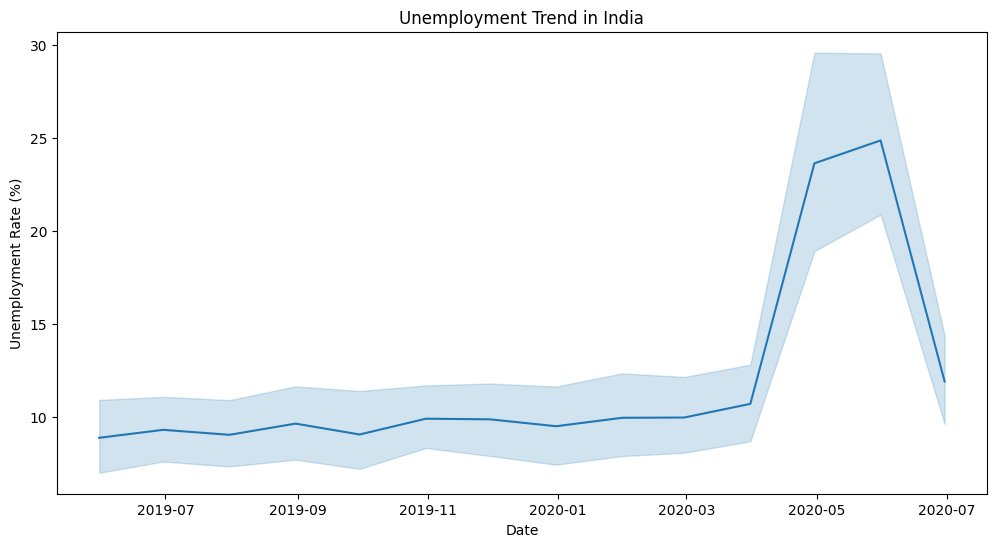

In [ ]:
# Data Visualization 1-7

# 1. Unemployment Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

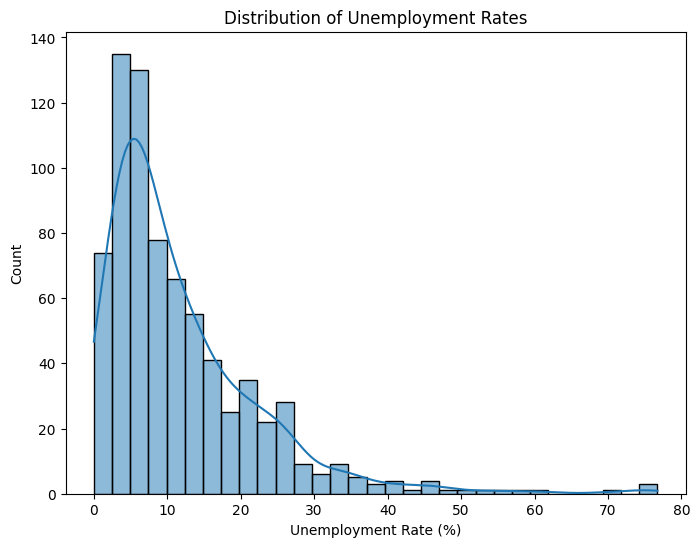

In [ ]:

# 2. Unemployment Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], kde=True) # Removed extra spaces around column name
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.show()


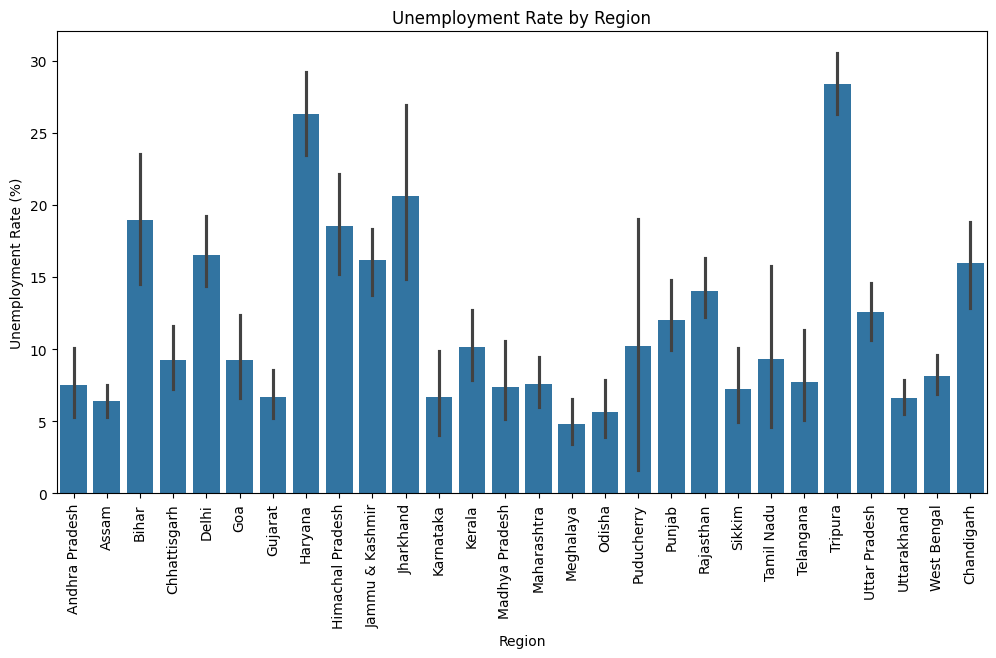

In [ ]:
# 3. Unemployment by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

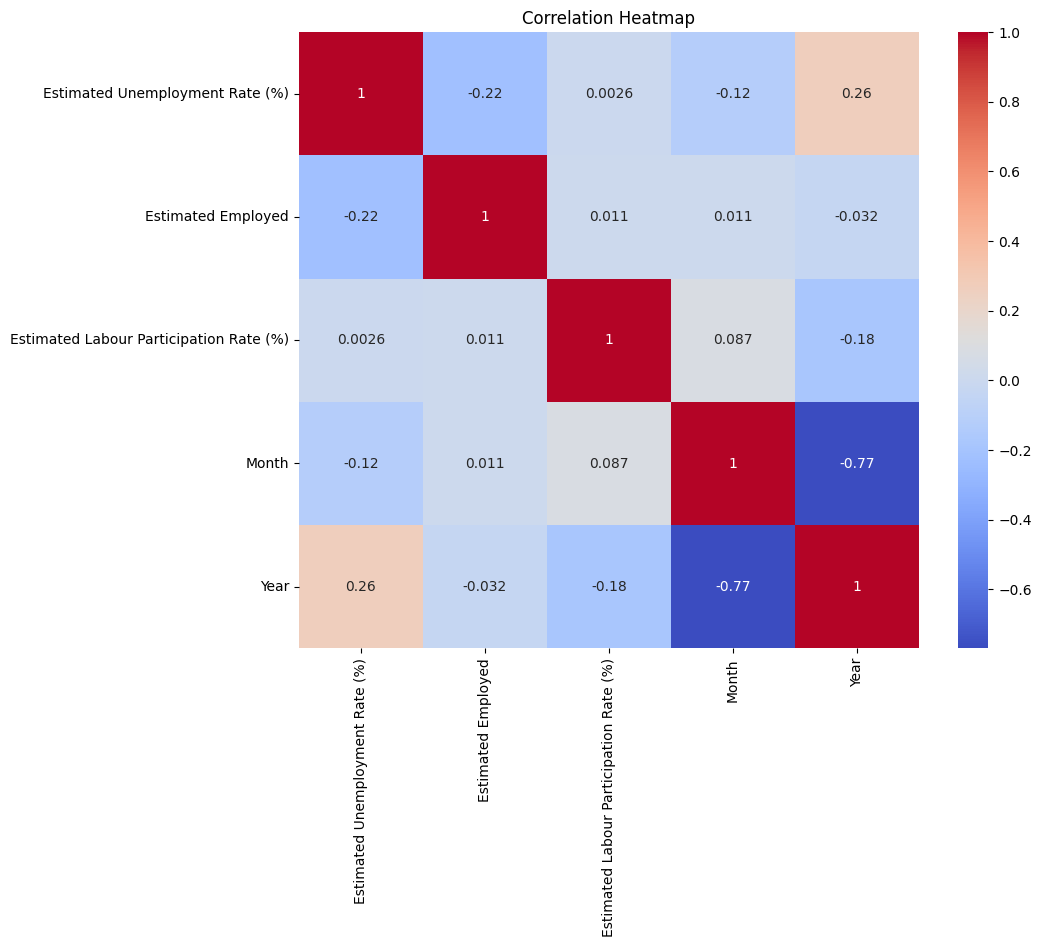

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Gone a select  only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

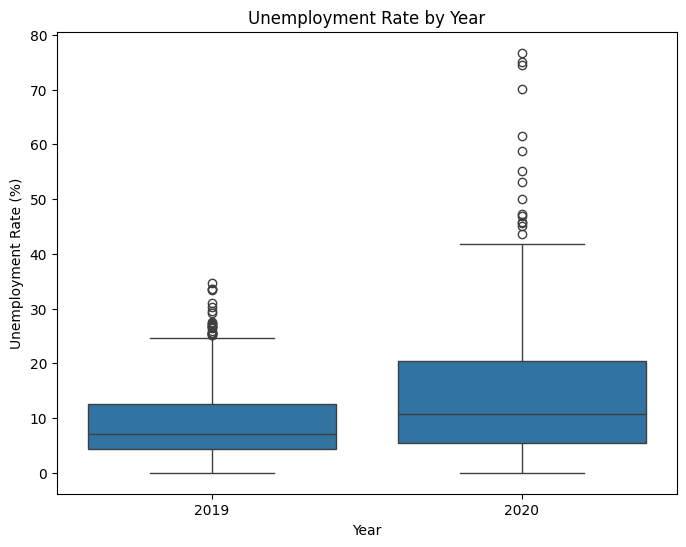

In [ ]:
# 6.  Unemployment Rate by Year (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

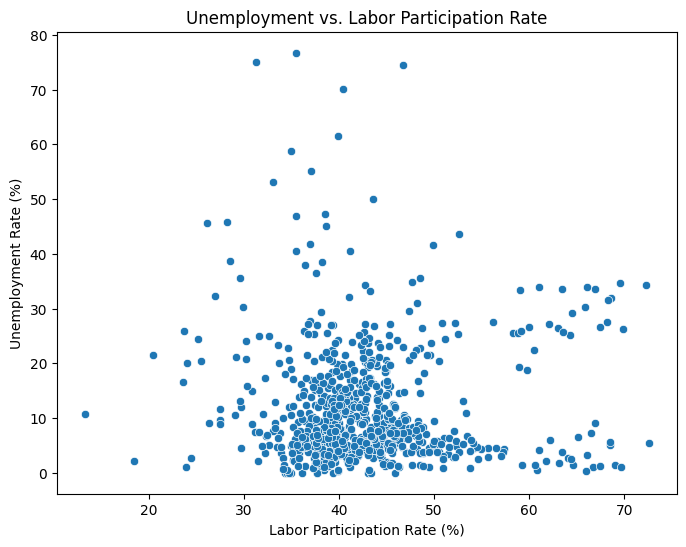

In [ ]:
# 7. Scatter Plot: Unemployment vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment vs. Labor Participation Rate")
plt.xlabel("Labor Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()



**Data Visualization**

1.	Unemployment Trend Over Time: Using a line plot (sns.lineplot()) helps you see the overall trend in unemployment over time.
2.	Unemployment Rate Distribution: A histogram (sns.histplot()) shows how frequently different unemployment rates occur.
3.	Unemployment by Region: A bar plot (sns.barplot()) lets you compare unemployment rates across different regions.
4.	Correlation Heatmap: The heatmap (sns.heatmap()) visualizes correlations between your features. Strong correlations suggest relationships between variables, which can be helpful for model building.
5.	Unemployment Rate by Year: A box plot (sns.boxplot()) provides insights into the distribution of unemployment rates for different years.
6.	Scatter Plot: The scatter plot shows the relationship between the unemployment rate and the labor participation rate.


**4. Model Building**

In [ ]:
# Model Building (Using df1 as an example, We can repeat for df2)
# Selecting  features and target variable
X = df1[['Month', 'Year', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df1['Estimated Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 2. Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 3. Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)


 **Model Building**

1.	Select Features and Target Variable: You decide which columns from your DataFrame will be used as input features (like 'Month', 'Year', etc.) to predict the target variable, which is the 'Estimated Unemployment Rate (%)'.
2.	Split Data: train_test_split() divides your data into two parts:
o	Training Data: Used to train your models (learn patterns from the data).
o	Testing Data: Used to evaluate how well your trained models perform on unseen data.
3.	Train Models: You build and train different regression models:
o	Linear Regression: Assumes a linear relationship between your features and the target variable.
o	Decision Tree Regression: Creates a tree-like structure to make predictions based on features.
o	Random Forest Regression: Ensembles multiple decision trees to improve prediction accuracy.


**5. Model Evaluation**

In [ ]:
# Model Evaluation
# Creating  a dictionary to store model results
model_results = {}

# Evaluate each model
for model_name, model, predictions in zip(['Linear Regression', 'Decision Tree', 'Random Forest'],
                                        [linear_model, tree_model, forest_model],
                                        [linear_pred, tree_pred, forest_pred]):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Print model evaluation results
for model_name, metrics in model_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

--- Linear Regression ---
MSE: 123.7006
RMSE: 11.1221
R-squared: 0.1456

--- Decision Tree ---
MSE: 125.4588
RMSE: 11.2008
R-squared: 0.1334

--- Random Forest ---
MSE: 89.9725
RMSE: 9.4854
R-squared: 0.3785




**Model Evaluation**


1.	Predict on Test Data: You use your trained models to make predictions on the test data.
2.	Calculate Metrics: The chosen metrics assess your model's accuracy:
o	Mean Squared Error (MSE): A common metric that measures the average squared difference between actual values and predicted values.
o	Root Mean Squared Error (RMSE): The square root of the MSE, providing an error measure in the same units as your target variable.
o	R-squared: A value between 0 and 1, indicating how well your model fits the data. A higher R-squared value means a better fit.
3.	Store Results: You keep track of the model's performance in a dictionary for easy comparison.
4.	Print Results: The results are presented clearly, allowing you to compare the performance of different models and choose the one that best predicts unemployment rates.


**Out Put Screen Shot**





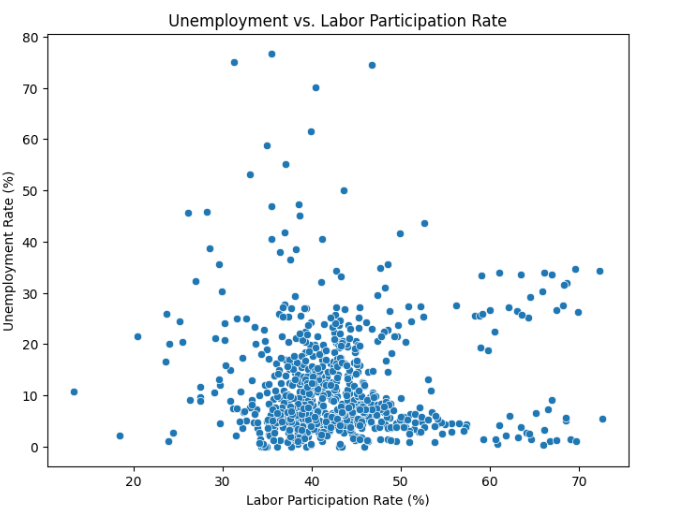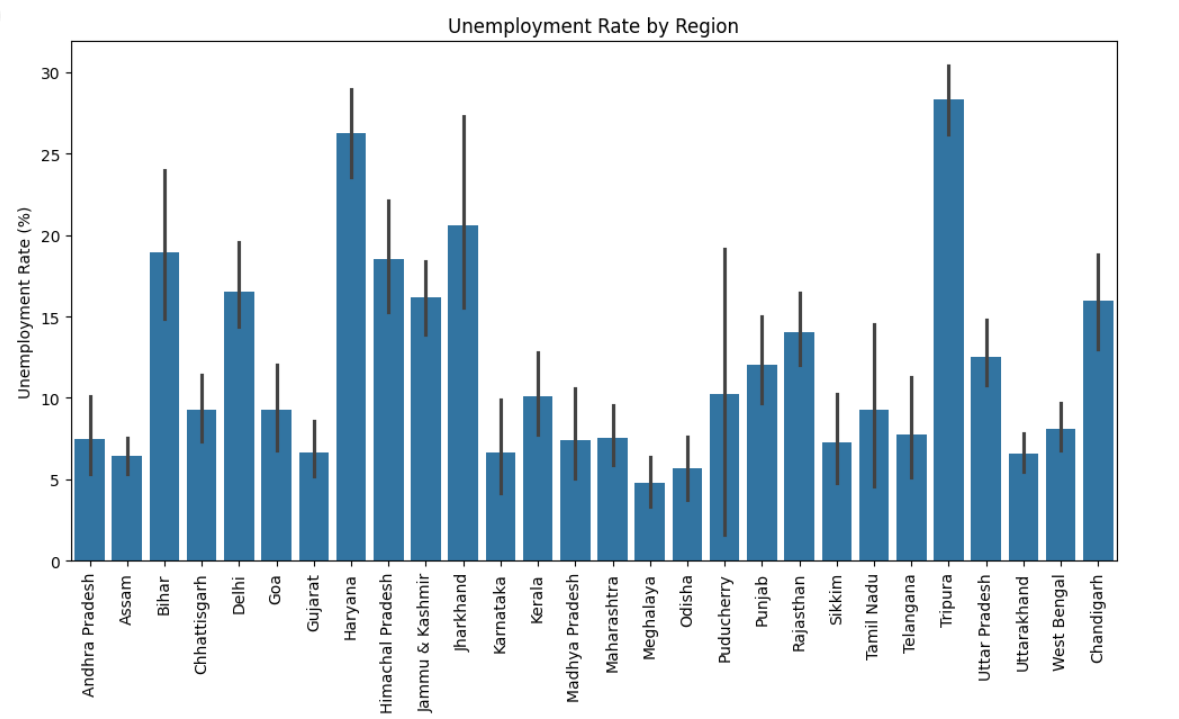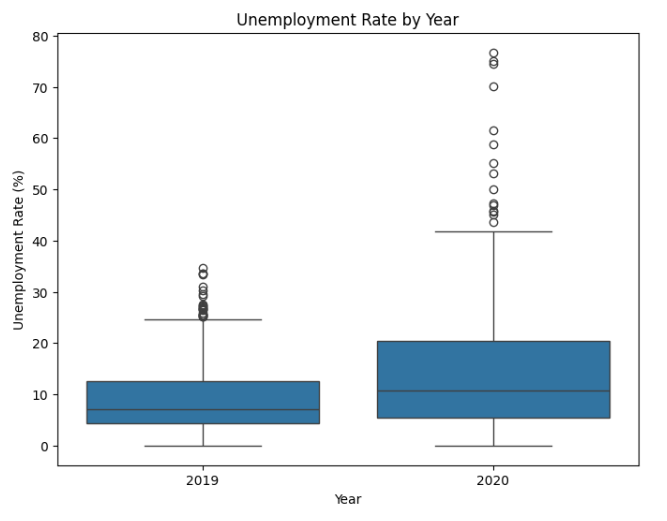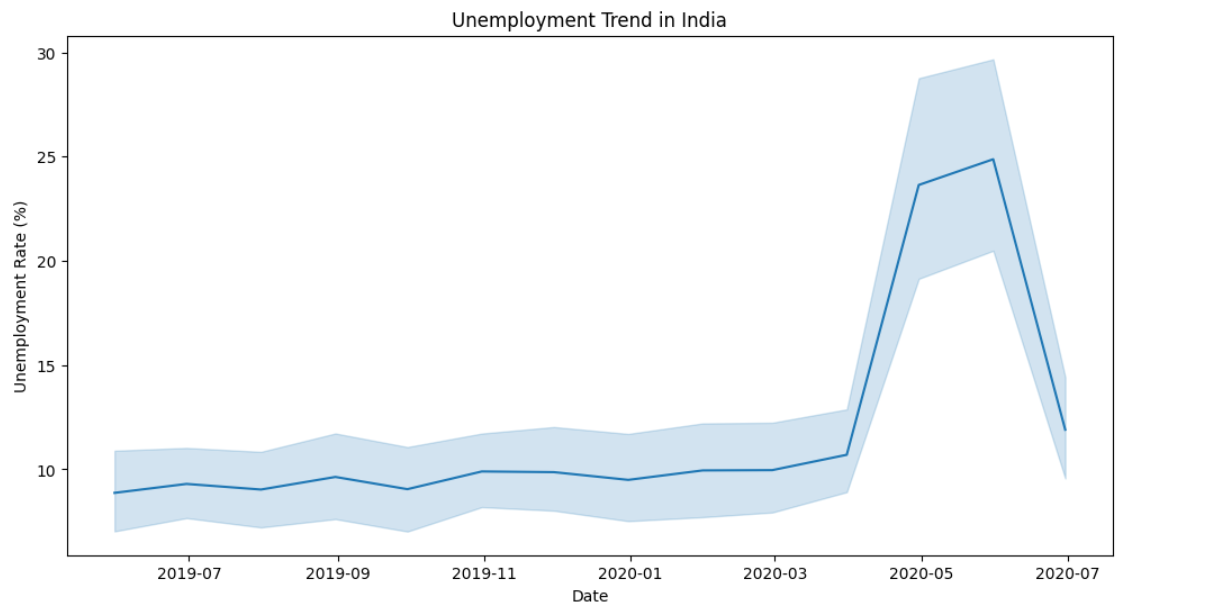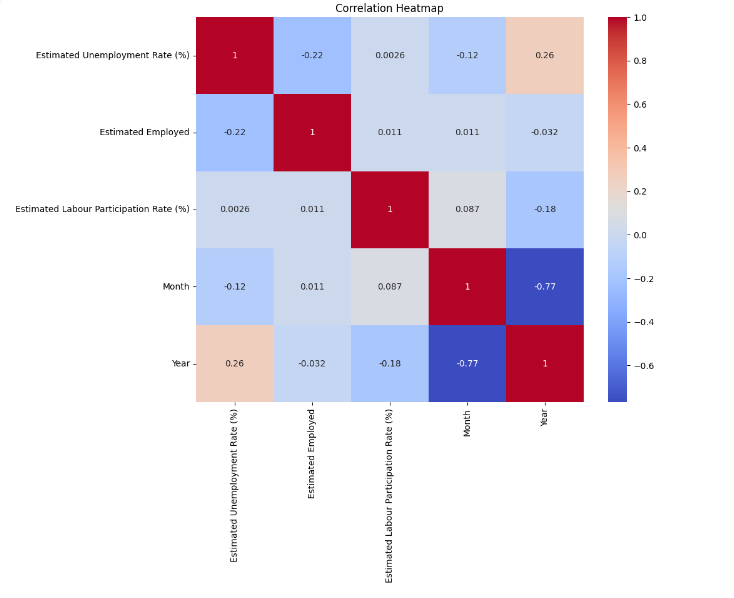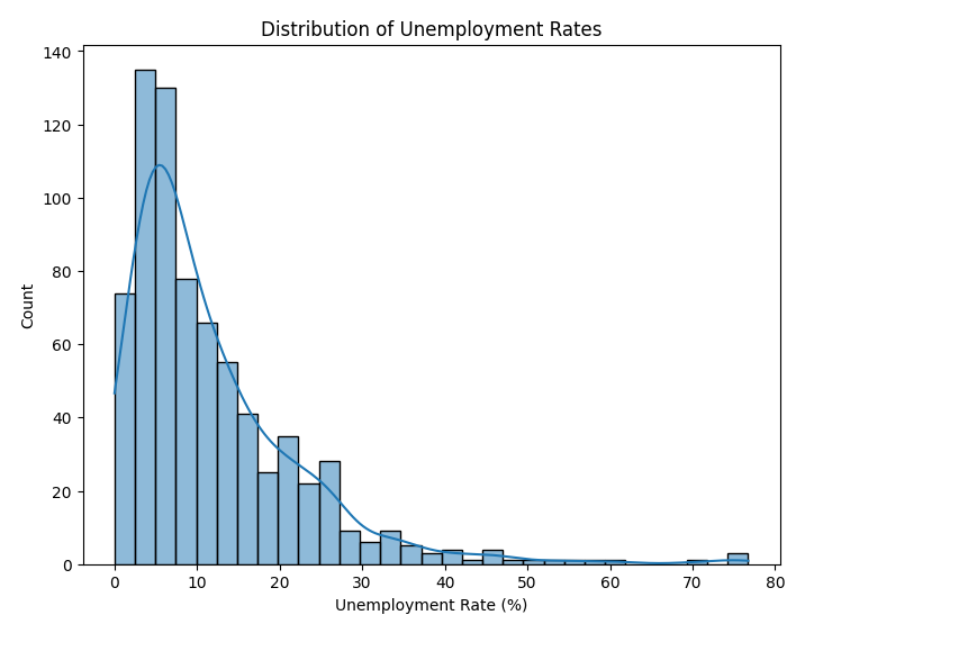

**FULL CODE**

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rat

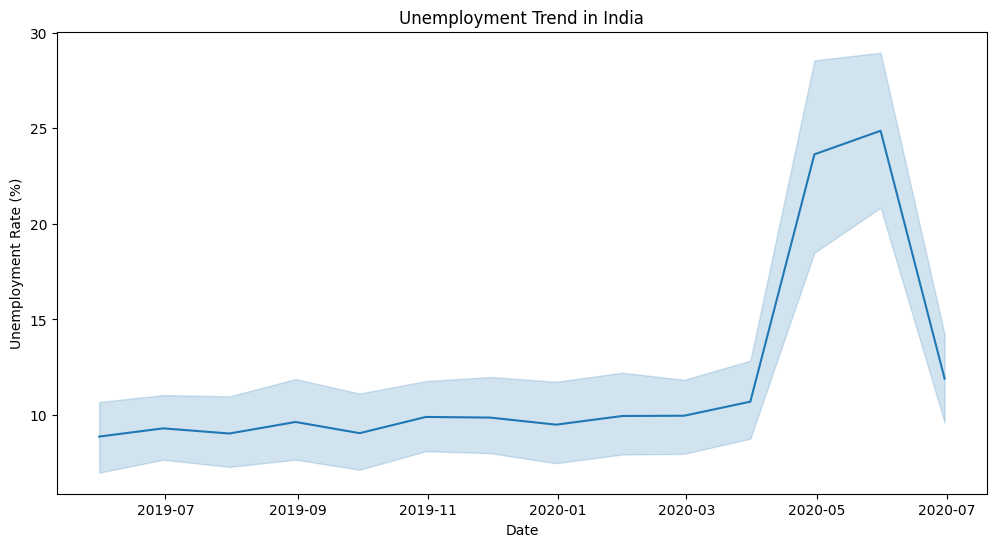

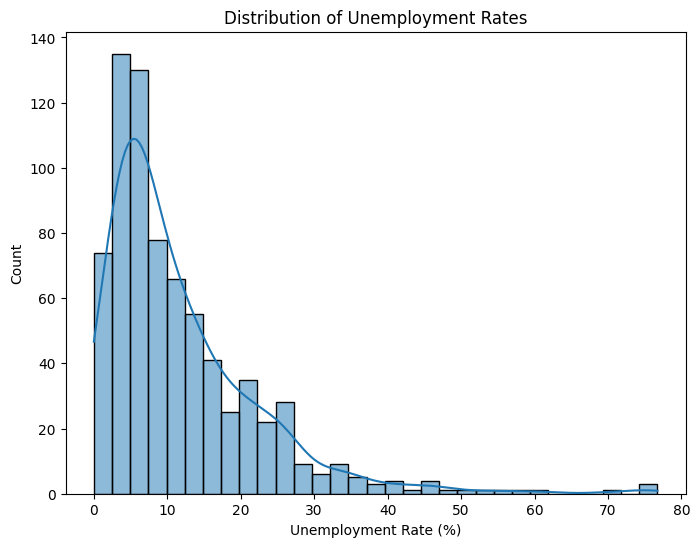

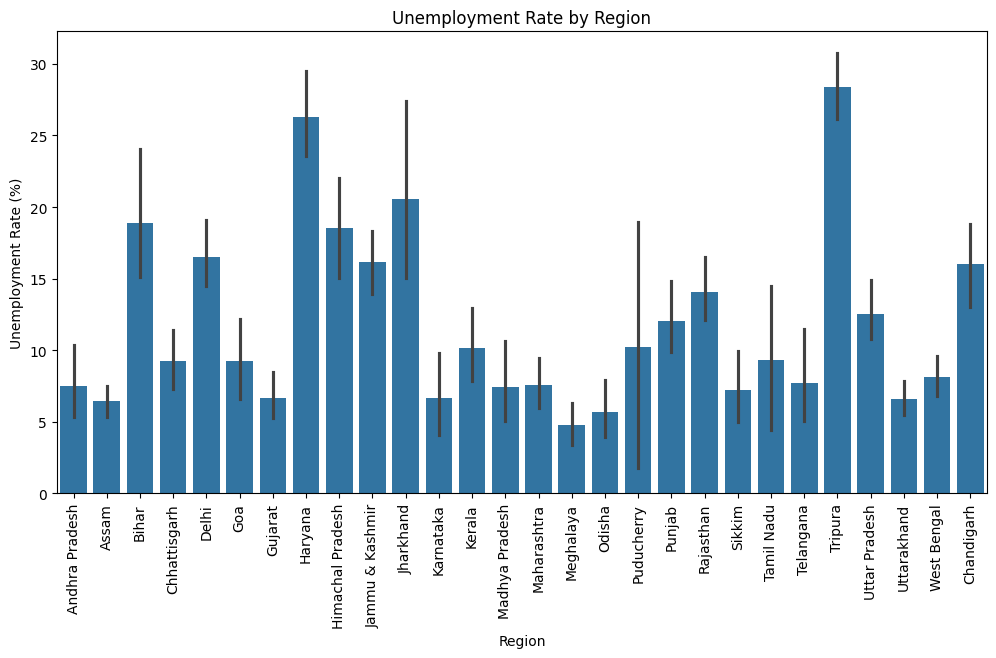

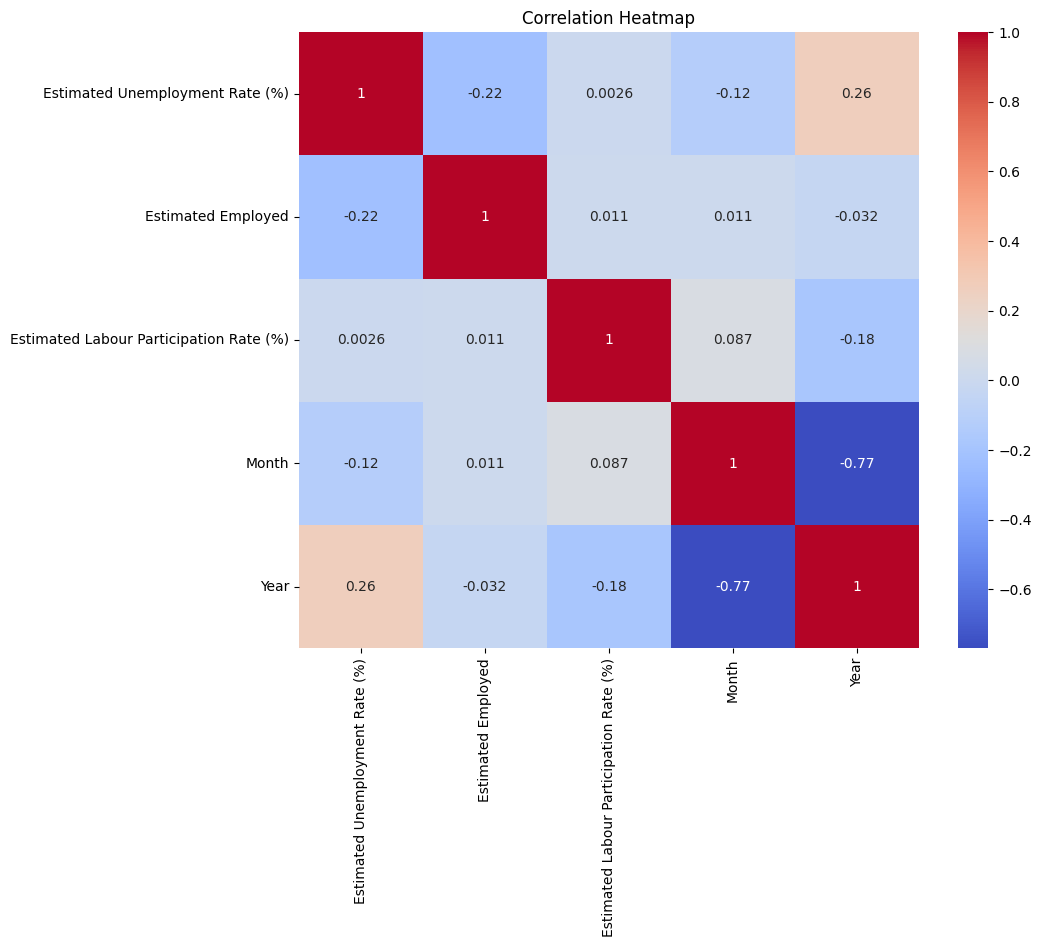

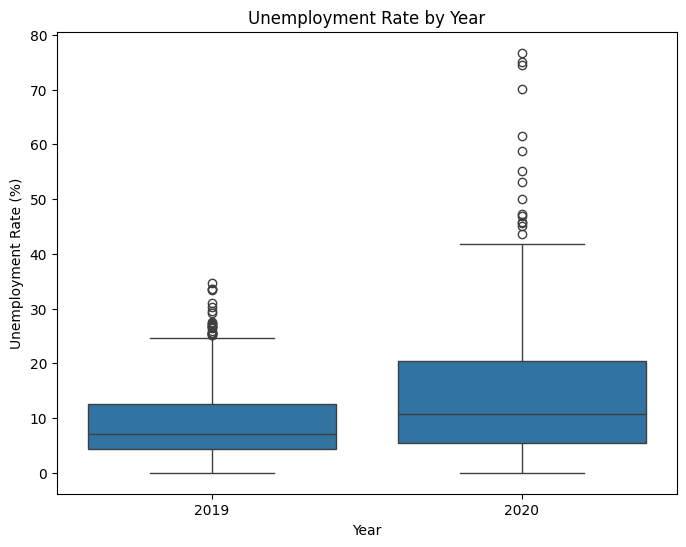

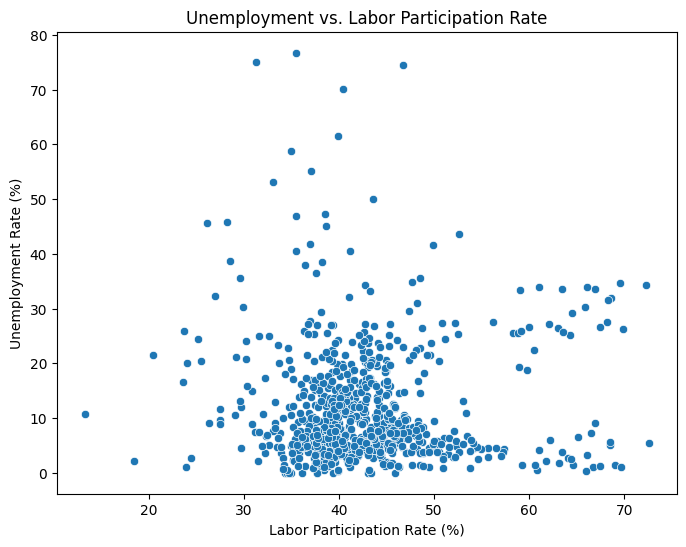

--- Linear Regression ---
MSE: 123.7006
RMSE: 11.1221
R-squared: 0.1456

--- Decision Tree ---
MSE: 126.2545
RMSE: 11.2363
R-squared: 0.1279

--- Random Forest ---
MSE: 85.3015
RMSE: 9.2359
R-squared: 0.4108



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Loading and Preprocessing ---
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your CSV file
file_pathone = '/content/drive/MyDrive/Dataset/Unemployment_in_India.csv'
file_pathtwo = '/content/drive/MyDrive/Dataset/Unemployment_Rate_upto_11_2020.csv'

# Load the datasets
df1 = pd.read_csv(file_pathone)
df2 = pd.read_csv(file_pathtwo)

# Data Exploration and Cleaning
# Display basic information and first few rows of each dataset
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Handle missing values (if any) - for simplicity, dropping rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Feature Engineering

# Remove leading spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Strip leading/trailing spaces from the 'Date' column in both dataframes
df1['Date'] = df1['Date'].str.strip()
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' column to datetime objects
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

# Extract month and year from 'Date' for potential seasonality analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year


# Data Visualization 1-7

# 1. Unemployment Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


# 2. Unemployment Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], kde=True) # Removed extra spaces around column name
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.show()


# 3. Unemployment by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Selecting  only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6.  Unemployment Rate by Year (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# 7. Scatter Plot: Unemployment vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment vs. Labor Participation Rate")
plt.xlabel("Labor Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()


# Model Building (Using df1 as an example, you can repeat for df2)
# Selecting  features and target variable
X = df1[['Month', 'Year', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df1['Estimated Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 2. Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 3. Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Model Evaluation
# Creating  a dictionary to store model results
model_results = {}

# Evaluate each model
for model_name, model, predictions in zip(['Linear Regression', 'Decision Tree', 'Random Forest'],
                                        [linear_model, tree_model, forest_model],
                                        [linear_pred, tree_pred, forest_pred]):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Print model evaluation results
for model_name, metrics in model_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

**End of 2nd  task**


---

